<a href="https://colab.research.google.com/github/dinesh-saka/Depression-Prediction-Using-BiLSTM/blob/main/eRisk.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df=pd.read_csv("depression_dataset_reddit_cleaned.csv")
df.head()

,clean_text,is_depression
0,we understand that most people who reply immed...,1
1,welcome to r depression s check in post a plac...,1
2,anyone else instead of sleeping more when depr...,1
3,i ve kind of stuffed around a lot in my life d...,1
4,sleep is my greatest and most comforting escap...,1


<Axes: >

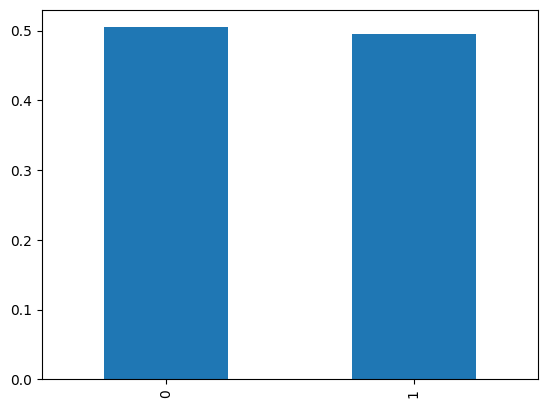

In [ ]:
df["is_depression"].value_counts(normalize=True).plot(kind="bar")

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7731 entries, 0 to 7730
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   clean_text     7731 non-null   object
 1   is_depression  7731 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 120.9+ KB


In [ ]:
import nltk
from nltk.stem import PorterStemmer
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
import re

In [ ]:
nltk.download("all")

[nltk_data] Downloading collection 'all'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to /root/nltk_data...
[nltk_data]    |   Package abc is already up-to-date!
[nltk_data]    | Downloading package alpino to /root/nltk_data...
[nltk_data]    |   Package alpino is already up-to-date!
[nltk_data]    | Downloading package averaged_perceptron_tagger to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Package averaged_perceptron_tagger is already up-
[nltk_data]    |       to-date!
[nltk_data]    | Downloading package averaged_perceptron_tagger_ru to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Package averaged_perceptron_tagger_ru is already
[nltk_data]    |       up-to-date!
[nltk_data]    | Downloading package basque_grammars to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Package basque_grammars is already up-to-date!
[nltk_data]    | Downloading package bcp47 to /root/nltk_data...
[nltk_data]    |   Package bcp47 is already up-to-dat

True

In [ ]:
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import Bidirectional
from tensorflow.keras.layers import Dense
from tensorflow.keras.preprocessing.text import one_hot
from tensorflow.keras.layers import Embedding
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential

In [ ]:
w=WordNetLemmatizer()
for i in range(len(df)):
  review=re.sub('[^a-zA-Z]', ' ', df["clean_text"][i])
  review=review.lower()
  review=review.split()
  review=[w.lemmatize(word) for word in review if not word in set(stopwords.words("english"))]
  review=" ".join(review)
  df["clean_text"][i]=review
df.head()

<ipython-input-8-1da4c1537d5e>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["clean_text"][i]=review


,clean_text,is_depression
0,understand people reply immediately op invitat...,1
1,welcome r depression check post place take mom...,1
2,anyone else instead sleeping depressed stay ni...,1
3,kind stuffed around lot life delaying inevitab...,1
4,sleep greatest comforting escape whenever wake...,1


In [ ]:
s=set()
for i in range(len(df)):
    k=df["clean_text"][i].split()
    for j in range(len(k)):
        s.add(k[j])
len(s)

18611

In [ ]:
voc_size=18611
onehot_repr1=[one_hot(words,voc_size)for words in df["clean_text"]]

In [ ]:
max=0
for i in onehot_repr1:
    if len(i)>max:
        max=len(i)
max

1844

In [ ]:
sent_length=max
embedded_docs1=pad_sequences(onehot_repr1,padding='pre',maxlen=sent_length)

In [ ]:
embedding_vector_features=sent_length*2
model=Sequential()
model.add(Embedding(voc_size,embedding_vector_features,input_length=sent_length))
model.add(Bidirectional(LSTM(64)))
model.add(Dense(1,activation='sigmoid'))
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])
print(model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 1844, 3688)        68637368  
                                                                 
 bidirectional (Bidirection  (None, 128)               1921536   
 al)                                                             
                                                                 
 dense (Dense)               (None, 1)                 129       
                                                                 
Total params: 70559033 (269.16 MB)
Trainable params: 70559033 (269.16 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
None


In [ ]:
Y=df["is_depression"]

In [ ]:
Y.shape

(7731,)

In [ ]:
embedded_docs1.shape

(7731, 1844)

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(embedded_docs1,Y,test_size=0.2,random_state=10,stratify=Y)

In [ ]:
print(X_train.shape,Y_train.shape,X_test.shape,Y_test.shape)

(6184, 1844) (6184,) (1547, 1844) (1547,)


In [ ]:
model.fit(X_train,Y_train,validation_data=(X_test,Y_test),epochs=5,batch_size=32)

Epoch 1/5
194/194 [==============================] - 98s 481ms/step - loss: 0.1640 - accuracy: 0.9411 - val_loss: 0.0883 - val_accuracy: 0.9664
Epoch 2/5
194/194 [==============================] - 89s 458ms/step - loss: 0.0393 - accuracy: 0.9867 - val_loss: 0.0831 - val_accuracy: 0.9735
Epoch 3/5
194/194 [==============================] - 86s 443ms/step - loss: 0.0138 - accuracy: 0.9960 - val_loss: 0.1306 - val_accuracy: 0.9573
Epoch 4/5
194/194 [==============================] - 82s 420ms/step - loss: 0.0061 - accuracy: 0.9982 - val_loss: 0.1228 - val_accuracy: 0.9638
Epoch 5/5
194/194 [==============================] - 79s 405ms/step - loss: 0.0024 - accuracy: 0.9994 - val_loss: 0.1393 - val_accuracy: 0.9593


In [ ]:
Y_pred=model.predict(X_test)

49/49 [==============================] - 7s 134ms/step


In [ ]:
Y_pred=(Y_pred>=0.5).astype("int")

In [ ]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
print(classification_report(Y_test,Y_pred))
print(confusion_matrix(Y_test,Y_pred))

              precision    recall  f1-score   support

           0       0.96      0.96      0.96       780
           1       0.96      0.96      0.96       767

    accuracy                           0.96      1547
   macro avg       0.96      0.96      0.96      1547
weighted avg       0.96      0.96      0.96      1547

[[748  32]
 [ 31 736]]
